In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [13]:
df = pd.read_csv("../data/mi_matched_precinct_use_this.csv")
df.columns


Index(['VTD_ID', 'total_pop', 'pop_density', 'prop_white', 'prop_Black',
       'prop_Hispanic', 'prop_AIA', 'prop_Asian', 'prop_married',
       'prop_nonfamily', 'prop_family_nonmarried', 'prop_hs_diploma',
       'prop_some_college', 'prop_bachelors', 'prop_higher', 'prop_under_hs',
       'prop_under_30k', 'prop_30_to_50k', 'prop_50_to_100k',
       'prop_more_than_100k', 'D_pct_vote', 'Weighted_ideology'],
      dtype='object')

In [14]:
x = df.drop(['prop_white', 'prop_higher', 'D_pct_vote', 'Weighted_ideology'], axis=1)
y = df['D_pct_vote']
x.columns


Index(['VTD_ID', 'total_pop', 'pop_density', 'prop_Black', 'prop_Hispanic',
       'prop_AIA', 'prop_Asian', 'prop_married', 'prop_nonfamily',
       'prop_family_nonmarried', 'prop_hs_diploma', 'prop_some_college',
       'prop_bachelors', 'prop_under_hs', 'prop_under_30k', 'prop_30_to_50k',
       'prop_50_to_100k', 'prop_more_than_100k'],
      dtype='object')

In [55]:
x.to_numpy()
y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

match_vtd = X_test['VTD_ID'].to_numpy()
X_test = X_test.drop('VTD_ID', axis=1)
X_train = X_train.drop('VTD_ID', axis=1)

In [56]:
lr = [.05, .1,.15,.2,.25,.3,.35]
accuracies = {}
for l in lr:
    reg = lgb.LGBMRegressor(learning_rate=l)
    reg.fit(X_train, y_train)
    r2 = reg.score(X_test, y_test)
    accuracies[l] = r2
print("Most accurate learning rate is:", max(accuracies, key=accuracies.get))


Most accurate learning rate is: 0.05


R-squared for percent of democratic votes is: 0.5956272100577805


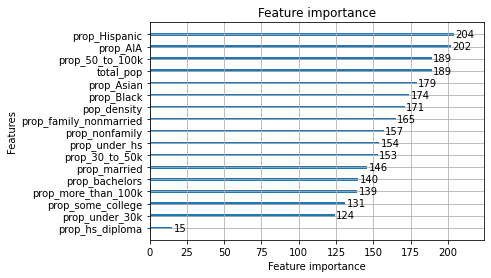

In [57]:
reg = lgb.LGBMRegressor(learning_rate=0.1)
reg.fit(X_train, y_train)
ydp_pred = reg.predict(X_test).transpose()
print("R-squared for percent of democratic votes is:", reg.score(X_test, y_test))
lgb.plot_importance(reg)

matched_ydp = np.column_stack((match_vtd, ydp_pred))



In [44]:
y = df['Weighted_ideology']
x.to_numpy()
y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [45]:
lr = [.05, .1,.15,.2,.25,.3,.35]
accuracies = {}
for l in lr:
    reg = lgb.LGBMRegressor(learning_rate=l)
    reg.fit(X_train, y_train)
    r2 = reg.score(X_test, y_test)
    accuracies[l] = r2
print("Most accurate learning rate is:", max(accuracies, key=accuracies.get))

Most accurate learning rate is: 0.05


R-squared for weighted ideology is: 0.6673292897136416


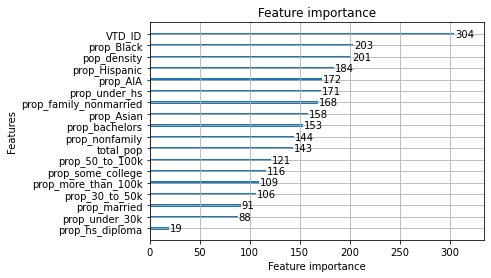

In [52]:
reg = lgb.LGBMRegressor(learning_rate=0.05)
reg.fit(X_train, y_train)
yw_pred = reg.predict(X_test)
print("R-squared for weighted ideology is:",reg.score(X_test, y_test))
lgb.plot_importance(reg)

matched_yw = np.column_stack((match_vtd, yw_pred))

In [83]:
df_ydp = pd.DataFrame(matched_ydp)
df_yw = pd.DataFrame(matched_yw)

df_ydp.to_csv("../data/lgbm_test_output.csv", index=False)

In [84]:
## now we will predict all of Michigan for funsies

all_vtds = pd.read_csv("../data/MI_VTD_demographics.csv")
all_vtd_ids = all_vtds['VTD_ID'].to_numpy()
all_test = all_vtds.drop(['VTD_ID','prop_higher','prop_white'], axis=1)
all_test

,total_pop,pop_density,prop_Black,prop_Hispanic,prop_AIA,prop_Asian,prop_married,prop_nonfamily,prop_family_nonmarried,prop_hs_diploma,prop_some_college,prop_bachelors,prop_under_hs,prop_under_30k,prop_30_to_50k,prop_50_to_100k,prop_more_than_100k
0,1199.706208,0.000020,0.001091,0.007787,0.003980,0.003651,0.586734,0.345760,0.067506,0.000781,0.159600,0.146117,0.602049,0.272519,0.216670,0.383058,0.127752
1,888.447426,0.000014,0.000000,0.007050,0.003035,0.004946,0.544382,0.376283,0.079335,0.002868,0.127402,0.131108,0.638538,0.390689,0.190452,0.276680,0.142178
2,732.583185,0.000008,0.000000,0.018285,0.024794,0.008878,0.427789,0.485719,0.086492,0.000000,0.150100,0.076132,0.744491,0.425132,0.307724,0.179958,0.087186
3,1234.485189,0.000060,0.010086,0.003118,0.005656,0.008460,0.521359,0.397147,0.081493,0.000000,0.215217,0.123143,0.632895,0.336506,0.257895,0.326713,0.078885
4,746.017711,0.000030,0.001958,0.016015,0.011473,0.000809,0.410391,0.438630,0.150979,0.000000,0.175692,0.053673,0.730105,0.461984,0.228334,0.239768,0.069915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2263.702306,0.000096,0.004608,0.020610,0.008239,0.022435,0.582442,0.295589,0.121969,0.003405,0.180882,0.116643,0.617093,0.235246,0.229657,0.339395,0.195702
4801,706.378252,0.000014,0.004658,0.022516,0.002329,0.000000,0.541748,0.314563,0.143689,0.000000,0.157110,0.049312,0.762615,0.347573,0.283495,0.285437,0.083495
4802,499.350584,0.000029,0.001116,0.010215,0.017693,0.003213,0.562134,0.311252,0.126614,0.000000,0.124344,0.081335,0.744921,0.319067,0.284055,0.338750,0.058128
4803,771.989062,0.000046,0.008375,0.012670,0.015137,0.007649,0.533309,0.332431,0.134260,0.000000,0.164235,0.068926,0.728332,0.349924,0.263310,0.309916,0.076850


In [87]:
all_predict = reg.predict(all_test).astype(str)
all_matched = np.column_stack([all_vtd_ids.astype(str),all_predict])
all_matched

array([['26001001001', '0.25249389778438064'],
       ['26001001002', '0.26676774613325444'],
       ['26001001003', '0.1427478874028412'],
       ...,
       ['26165165019', '0.15097869352397192'],
       ['26165165020', '0.25637066663065816'],
       ['26165165021', '0.1726663588682824']], dtype='<U32')

In [ ]:
all_matched.to_csv("../data/lgbm_test_output.csv", index=False)